# Introduction to astronomical coordinates using `astropy.coordinates`<img src='images/logo.png' width=300px align='right'>
This tutorial will give you many tools to understand and navigate the basic astronomical coordinates that we use at the Thacher Observatory. Keep in mind that this is only an introduction, and the topic of astronomical coordinates is quite a bit deeper than we will cover here. However, this should give you enough experience to get up and running.

This tutorial is based heavily on a tutorial from http://tutorials.astropy.org in which the `astropy.coordinates` package and related astropy functionality is explored for the purposes of planning observations and other exercises focused on large coordinate catalogs.

You may find it helpful to keep [the Astropy documentation for the coordinates package](http://docs.astropy.org/en/stable/coordinates/index.html) open along side this tutorial for reference and additional reading.

Before we get started with the coding, let us first understand the basics of a couple different sky coordinate systems

## Crash Course in Alt-Az Coordinates
Altitude-Azimuth, Alt-Az, or horizon coordinates are a longitude-latitude system for locating any position on the sky from **your specific vantage point on Earth.** This last part is emphasized, because the Alt-Az location of something on the sky at a specified time is different for people at different locations. However, the convention is fairly simple and intuitive, particularly if you are familiar with bearings (as most Thacher students are).

The azimuth of a source is a degree measured in the easterly direction from North (*e.g.*, zero azimuth is due North, and 90 degrees azimuth is due East). In other words, it is simply the *bearing* of the star.
<img src='images/Azimuth-Altitude.png' align='center' width=300px>

It can be seen in the next picture why this coordinate system is tied to your location on earth. The picture shows the altitude-azimuth system that would be used by an observer in the Western US. If you imagine the Alt-Az system used by someone in Brazil, for instance, you can see how the same Alt-Az coordinates in both locations would correspond to two totally different directions in the sky.
<img src='images/HorizonCoords.gif' align='center' width=400px>

## Crash Course in Equitorial Coordinates (Right Ascension and Declination)
Equitorial coordinates are based on the Earth, and so any observer located anywhere on Earth would be able to find an object on the sky given one set of coordinates. The latitude lines project out into space to create the lines of "declination." Therefore, any celestial object that has a declination equal to your geocentric latitude will reach your local zenith (altitude = 90 degrees) at its highest point. One simple example is to imagine the altitude of the North Star if you were at the North Pole.

The line of zero declination is called the Celestial Equator and it corresponds to the geocentric equator. The orbit of the Earth around the Sun is not perfectly aligned with the rotation of the Earth. Therefore, the plane of the Solar System creates a line across the sky that does not correspond to the Celestial Equator. This line is called the "ecliptic," and it is offset by approximately 23.5 degrees (see the figure below). The intersections of the celestial equator and the ecliptic define two specific directions in the sky that correspond to the two equinoxes (in Spring and Fall) when the Sun is directly over the Earth's equator.

This is all quite technical, however, it is important for understanding the longitudinal coordinate of the Equitorial System. It is called "Right Ascension" (RA) and there are 24 *hours* of RA in a day. The line of RA = 0 corresponds to the autumnal (or fall) equinox. This is shown in the following diagram... stare at it for a while.
<img src='images/RADec_celestial_sphere.png' align='center' width=400px>

The following image shows how this all bears out in a practical situation. It is a screen shot from the software Stellarium&mdash;which is free and highly recommended for anyone wanting to explore the sky and the different coordinate systems in a hands-on way&mdash;showing a local scene in the northern hemisphere with a light blue grid on the sky that represents the equitorial coordinate system. The lines of declination are separated by 5 degrees.
<img src='images/RADec_from_Ground.png' align='center' width=900px>

To test your knowledge of what is going on, first identify where the altitude = 0 degrees line would be located. Then identify what celestial object would be located at (or actually, very near) the point where all the lines of longitude converge.

## Loading packages
Before we do anything we need to import some important and useful packages. A short mention of each package is included. For more details, check the web. 

In [ ]:
# Tools for connecting with web servers
import urllib
# Utilities for displaying images in jupyter notebooks
import IPython.display
# Numpy, what else can I say?
import numpy as np

In [ ]:
# Display images in the browser window
%matplotlib inline
# Matplotlib, what else can I say?
from matplotlib import pyplot as plt

In [ ]:
# Utilities particular to astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

## Describing on-sky locations with `coordinates`
OK! Now we are ready to begin... Let's start by considering a field around the picturesque Hickson Compact Group 7.  To do anything with this, we need to get an object that represents the coordinates of the center of this group.

In Astropy, the most common object you'll work with for coordinates is `SkyCoord`.  A `SkyCoord` can be created most easily using angles as inputs (shown below).  It's also wise to explicitly specify the frame your coordinates are in, although this is not strictly necessary because the default is ICRS. 

If you're not sure what ICRS is, it stands for International Coordinate Reference System, and it is safe to think of it as an approximation to an equatorial system at the J2000 equinox.

In [ ]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')
hcg7_center

SkyCoord will also accept string-formatted coordinates either as separate strings for ra/dec or a single string.  You'll have to give units, though, if they aren't part of the string itself.

In [ ]:
SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')

In [ ]:
SkyCoord('0:39:15.9 0:53:17.016', unit=(u.hour, u.deg), frame='icrs')

If the object you're interested in is in [SESAME](http://cdsweb.u-strasbg.fr/cgi-bin/Sesame) (which is basically SIMBAD with a couple other databases available), you can also look it up directly from its name using the `SkyCoord.from_name()` class method<sup>1</sup>. Note that this requires an internet connection.  It's safe to skip if you don't have one, because we defined it above explicitly.

<sub> <sup>1</sup>If you don't know what a class method is, think of it like an alternative constructor for a `SkyCoord` object -- calling `SkyCoord.from_name()` with a name gives you a new `SkyCoord` object. For more detailed background on what class methods are and when they're useful, see [this page](https://julien.danjou.info/blog/2013/guide-python-static-class-abstract-methods).</sub>

In [ ]:
hcg7_center = SkyCoord.from_name('HCG 7')
hcg7_center

This object we just created has various useful ways of accessing the information contained within it.  In particular, the ``ra`` and ``dec`` attributes are specialized [``Quantity``](http://docs.astropy.org/en/stable/units/index.html) objects (actually, a subclass called [``Angle``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Angle.html), which in turn is subclassed by [``Latitude``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Latitude.html) and [``Longitude``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Longitude.html)).  These objects store angles and provide pretty representations of those angles, as well as some useful attributes to quickly convert to common angle units:

In [ ]:
type(hcg7_center.ra), type(hcg7_center.dec)

In [ ]:
hcg7_center.dec

In [ ]:
hcg7_center.ra

In [ ]:
hcg7_center.ra.hour

Now that we have a `SkyCoord` object, we can try to use it to access data from the [Sloan Digitial Sky Survey](http://www.sdss.org/) (SDSS).  Let's start by trying to get a picture using the SDSS image cutout service to make sure HCG7 is in the SDSS footprint and has good image quality.

This requires an internet connection, but if it fails, don't worry: the file is included in the repository so you can just let it use the local file``'HCG7_SDSS_cutout.jpg'``, defined at the top of the cell.  

In [ ]:
impix = 1024
imsize = 12*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urllib.parse.urlencode(dict(ra=hcg7_center.ra.deg, 
                                     dec=hcg7_center.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

urllib.request.urlretrieve(url, 'HCG7_SDSS_cutout.jpg')

Now lets take a look at the image.

In [ ]:
IPython.display.Image('HCG7_SDSS_cutout.jpg')

Very pretty!

# Exercise

Create a `SkyCoord` of some other astronomical object you find interesting. Examples could be M31, M51, or Orion A...

In [15]:
boomerang = SkyCoord.from_name('Boomerang Nebula')
boomerang

<SkyCoord (ICRS): (ra, dec) in deg
    (191.19204793, -54.52036929)>

Express the RA of the `SkyCoord` object you just created in decimal hours, decimal degrees, and decimal radians by utilizing the built in methods of the `SkyCoord` object.

In [19]:
ra = boomerang.ra
dec = boomerang.dec

print('RA in Degrees: {0} deg'.format(ra.deg))
print('Dec in Degrees: {0} deg'.format(dec.deg))

print('RA in Hours: {0} h'.format(ra.hour))
print('Dec in Hours: {0} deg'.format(dec.hour))

print('RA in Radians: {0} rad'.format(ra.rad))
print('Dec in Radians: {0} rad'.format(dec.rad))


RA in Degrees: 191.19204793 deg
Dec in Degrees: -54.52036929 deg
RA in Hours: 12.74613652866667 h
Dec in Hours: -3.6346912860000007 deg
RA in Radians: 3.336930740009309 rad
Dec in Radians: -0.9515599535137031 rad


Using only a single method/function call on the `SkyCoord` object you just created to print a string with the RA/Dec in the form 'HH:MM:SS.S DD:MM:SS.S'.  Check your answer against an academic paper or some web site like [SIMBAD](http://simbad.u-strasbg.fr/simbad/) that will show you sexigesimal coordinates for the object.

(Hint: `SkyCoord.to_string()` might be worth reading up on)

In [20]:
print(boomerang.to_string('hmsdms'))

12h44m46.0915032s -54d31m13.329444s


Now get an image of that object from the Digitized Sky Survey and download it and/or show it in the notebook. Bonus points if you figure out the (one-line) trick to get it to display in the notebook *without* ever downloading the file yourself.

(Hint: STScI has an easy-to-access [copy of the DSS](https://archive.stsci.edu/dss/).  The pattern to follow for the web URL is ``http://archive.stsci.edu/cgi-bin/dss_search?f=GIF&ra=RA&dec=DEC``)

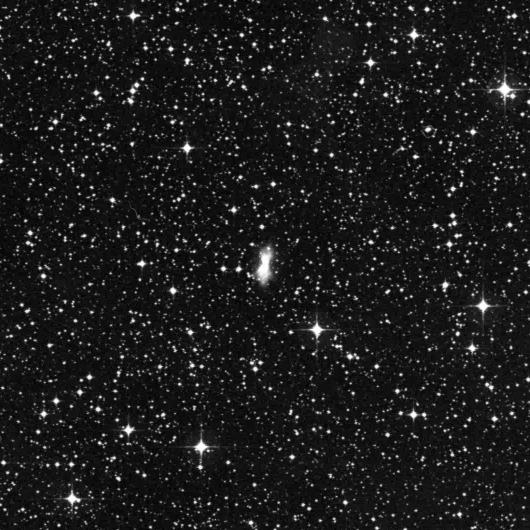

In [29]:
url = f"http://archive.stsci.edu/cgi-bin/dss_search?f=GIF&ra={ra.deg}&dec={dec.deg}"
img = urllib.request.urlopen(url).read() # read the image data, without saving it to disk
IPython.display.Image(img)

## Wrap-up

For lots more documentation on the many other features of `astropy.coordinates`, check out [its section of the documentation](http://astropy.readthedocs.org/en/latest/coordinates/index.html).